## Homework 2  - Part 2 - Task 1: PCA
We will use the Fashion-MNIST dataset to build a PCA model. <br>
https://github.com/zalandoresearch/fashion-mnist <br>
Then, we will use the PCA model to <br>
(1) visualize the data in 2D <br>
(2) generate new images as a generative model <br>
This is a guided-task: <br>
You will see the output of a code cell and then figure out the code in that cell. <br>
In each code cell, there are instructions to help you. <br>
This is a very efficient and effective way to learn how to program with sk-learn

### Create your "signature"
Run the cell below but do NOT modify the cell. \
The signature needs to be displayed right below the cell in this file. \
You will get zero point if the signature is not displayed.

In [35]:
import platform, socket, getpass
from time import time
from datetime import datetime
import random
signature=[socket.gethostbyname(socket.gethostname()),
           getpass.getuser(),
           datetime.now(),
           random.random()]
print(signature)

['172.28.0.12', 'root', datetime.datetime(2025, 9, 29, 16, 13, 27, 440061), 0.8231106351533072]


#### First, we load the dataset

In [36]:
# load the data, and it may take a while
from sklearn.datasets import fetch_openml
fasion_mnist=fetch_openml(name="Fashion-MNIST")

In [38]:
#contact TA or instructor if this cell does not work - mostly because you have old versions of some packages
try:
    data=fasion_mnist.data.values
except:
    data=fasion_mnist.data
#data should be numpy array
images=data.reshape(-1,28,28)
target=fasion_mnist.target.astype('int64')

In [39]:
#a row in data is an image (28x28 reshaped into a vector of 784 elements)
data.shape

(70000, 784)

In [ ]:
# images[0] is the first image (28x28)
images.shape

(70000, 28, 28)

In [ ]:
#an element in target is the class label of the corresponding image in data
target.shape

(70000,)

In [ ]:
[target.min(), target.max()]

[0, 9]

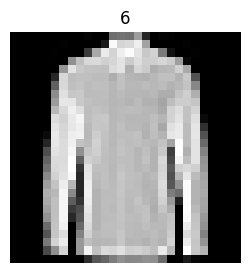

<Figure size 640x480 with 0 Axes>

In [40]:
# show some of the images
import matplotlib.pyplot as plt
from IPython import display
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, target.shape[0], 1000):
    x=data[n,:]
    x=x.reshape(28,28) # reshape a vector to an image
    ax.imshow(x, cmap='gray')
    ax.axis('off')
    ax.set_title(target[n])
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1)

#### we need the function plot_components for visualization

In [41]:
from matplotlib import offsetbox
import numpy as np
def plot_components(data, model, images, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()

    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')

    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

### Your work begins here

In [42]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#it runs faster to get the eigenvectors and eigenvalues
#it is more memory efficient
#the function 'fit' computes eigenvectors and eigenvalues
#use 'fit_transform' to do fit and forward transform together
# your code:

from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=2, batch_size=1024)
Z2 = ipca.fit_transform(data)

print("Explained variance ratio (PC1, PC2):", ipca.explained_variance_ratio_)
print("Cumulative variance (2 PCs):", ipca.explained_variance_ratio_.sum())

Explained variance ratio (PC1, PC2): [0.29056418 0.17737964]
Cumulative variance (2 PCs): 0.46794382441999993


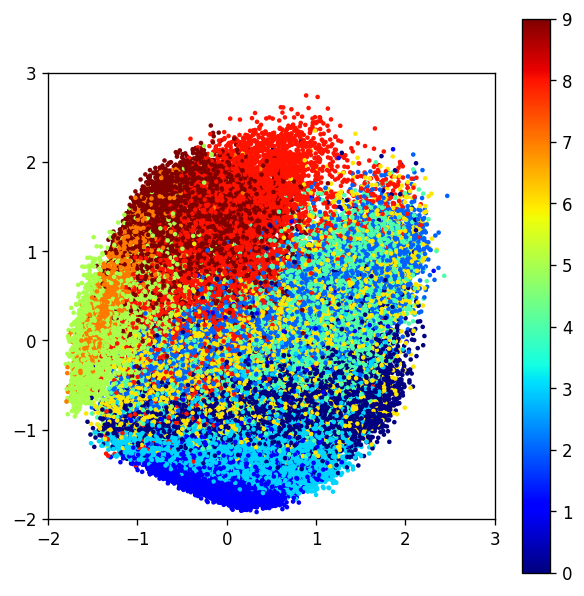

In [43]:
#show the data points in 2D
#you can find example code in my lecture notes (notebook files)
#you need to create a figure and axis:  fig, ax = plt.suplots()
# your code:

from sklearn.decomposition import IncrementalPCA
X = (data / 255.0).astype('float32')
ipca = IncrementalPCA(n_components=2, batch_size=1024)
Z2 = ipca.fit_transform(X)

import matplotlib.pyplot as plt

import numpy as np
Z2w = Z2 / np.sqrt(ipca.explained_variance_)

fig, ax = plt.subplots(figsize=(6,6), dpi=120)
sc = ax.scatter(Z2w[:,0], Z2w[:,1], s=3, c=target, cmap='jet', alpha=1, vmin=0, vmax=9)
plt.colorbar(sc, ax=ax)
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-2, 3); ax.set_ylim(-2, 3)
plt.show()

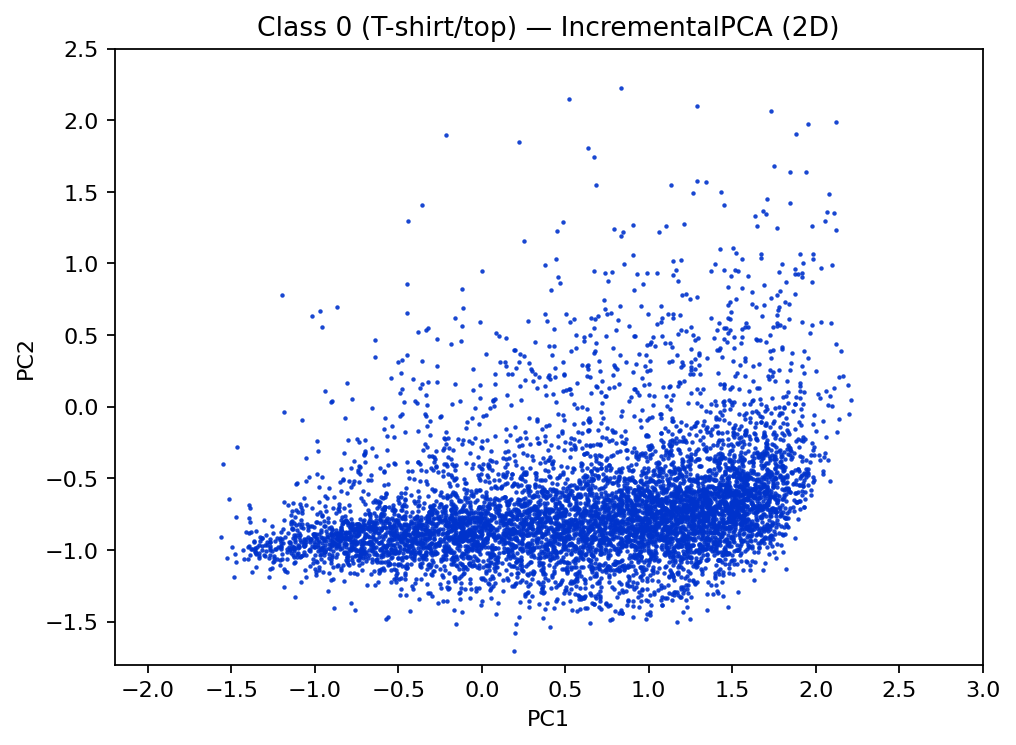

In [44]:
#show only the data points/images with class label=0 (i.e. target is 0) in 2D
# your code:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,5), dpi=160)
ax.scatter(
    Z2w[mask0,0], Z2w[mask0,1],
    s=4, c='#0033cc', alpha=0.9, linewidths=0
)

ax.set_xlim(-2.2, 2.8)
ax.set_ylim(-1.8, 2.2)

ax.set_xticks(np.arange(-2.0, 3.1, 0.5))
ax.set_yticks(np.arange(-1.5, 2.6, 0.5))

ax.set_xlabel("PC1"); ax.set_ylabel("PC2")
ax.set_title("Class 0 (T-shirt/top) — IncrementalPCA (2D)")
plt.show()




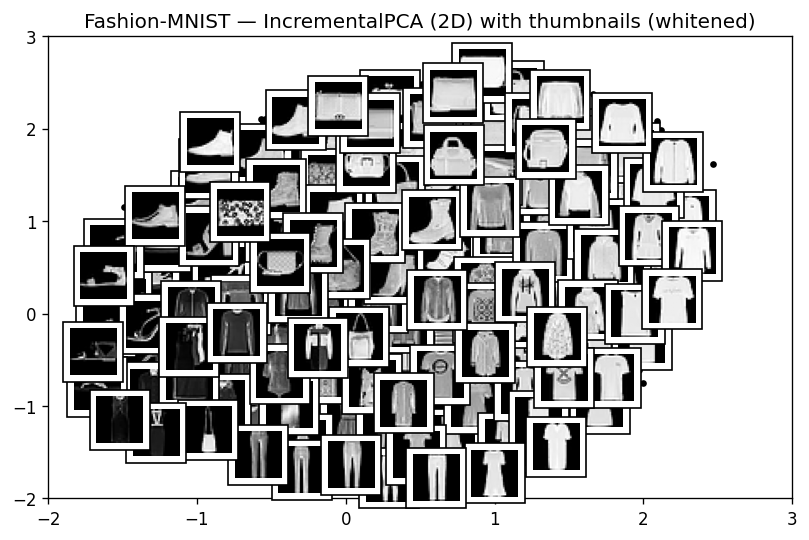

In [45]:
# use plot_components to show the data points
# the parameter 'model' of plot_components refers to the pca model
# your code:

from sklearn.decomposition import IncrementalPCA
import numpy as np
import matplotlib.pyplot as plt

X = (data / 255.0).astype('float32')
ipca_thumbs = IncrementalPCA(n_components=2, batch_size=1024).fit(X)

Z2  = ipca_thumbs.transform(X)
Z2w = Z2 / np.sqrt(ipca_thumbs.explained_variance_)

class PreProj:
    def __init__(self, proj): self.proj = proj
    def fit_transform(self, _): return self.proj

proxy = PreProj(Z2w)

fig, ax = plt.subplots(figsize=(8,5), dpi=120)
plot_components(
    X, proxy,
    images=images,
    ax=ax,
    thumb_frac=0.06,
    cmap='gray'
)

ax.set_xlim(-2, 3)
ax.set_ylim(-2, 3)
ax.set_xticks(np.arange(-2, 4, 1))
ax.set_yticks(np.arange(-2, 4, 1))

ax.set_title("Fashion-MNIST — IncrementalPCA (2D) with thumbnails (whitened)")
plt.show()



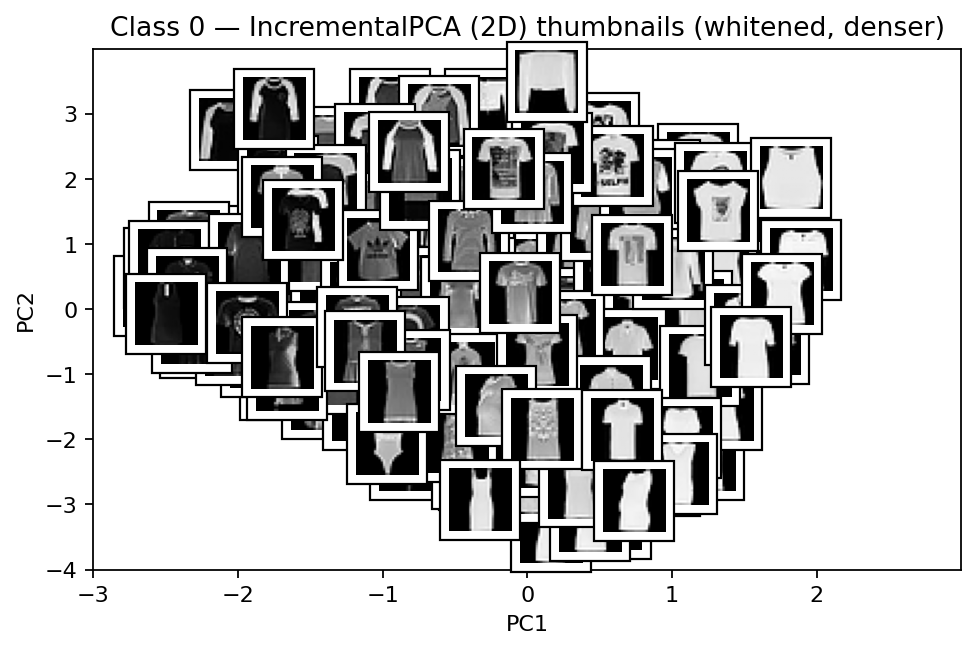

In [57]:
# use plot_components to show the data points with class label=0
# you may need something like this: data[target==0], images[target==0]
# your code:

class PreProj:
    def __init__(self, proj): self.proj = proj
    def fit_transform(self, _): return self.proj

import numpy as np
import matplotlib.pyplot as plt

rng   = np.random.RandomState(0)
perm  = rng.permutation(len(X0))
X0p, imgs0p, Z2w0p = X0[perm], imgs0[perm], Z2w_0[perm]

fig, ax = plt.subplots(figsize=(7,5), dpi=160)

sl1 = slice(0, None, 2)
plot_components(
    X0p[sl1], PreProj(Z2w0p[sl1]),
    images=imgs0p[sl1], ax=ax, thumb_frac=0.05, cmap='gray'
)

sl2 = slice(1, None, 2)
plot_components(
    X0p[sl2], PreProj(Z2w0p[sl2]),
    images=imgs0p[sl2], ax=ax, thumb_frac=0.05, cmap='gray'
)

for ln in list(ax.lines):
    if hasattr(ln, "get_marker") and ln.get_marker() == ".":
        ln.remove()

ax.set_xlim(-3.0, 3.0)
ax.set_ylim(-4.0, 4.0)
ax.set_xticks(np.arange(-3.0, 3.0, 1))
ax.set_yticks(np.arange(-4.0, 4.0, 1))
ax.set_aspect('auto')

ax.set_aspect(0.45)
ax.set_xlabel("PC1"); ax.set_ylabel("PC2")
ax.set_title("Class 0 — IncrementalPCA (2D) thumbnails (whitened, denser)")
plt.show()






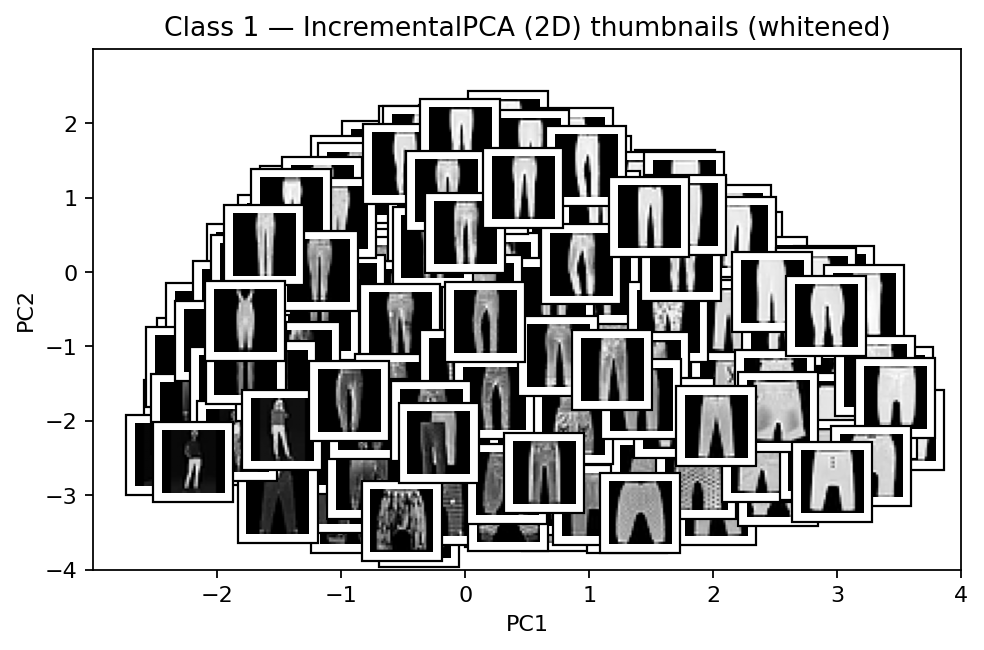

In [63]:
# use plot_components to show the data points with class label=1
# you may need something like this: data[target==1], images[target==1]
# your code:

class PreProj:
    def __init__(self, proj): self.proj = proj
    def fit_transform(self, _): return self.proj

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA

def _format_axes(ax, title):
    for ln in list(ax.lines):
        if getattr(ln, "get_marker", lambda: None)() == ".": ln.remove()
    ax.set_xlim(-3.0, 4.0)
    ax.set_ylim(-4.0, 3.0)
    ax.set_xticks(np.arange(-2.0, 4.1, 1))
    ax.set_yticks(np.arange(-4.0, 3.0, 1))
    ax.set_aspect(0.6)
    ax.set_xlabel("PC1"); ax.set_ylabel("PC2")
    ax.set_title(title)

def plot_class_thumbnails(data, images, target, class_id, *,
                          Z2w_all=None,
                          rng_seed=1, thumb_frac=0.05, cmap='gray'):

    m = (target == class_id)
    Xc, ImgC = data[m], images[m]

    if Z2w_all is not None:
        Z2c = Z2w_all[m]
    else:
        ipca = IncrementalPCA(n_components=2, batch_size=1024, whiten=True)
        Z2c = ipca.fit_transform(Xc)

    rng  = np.random.RandomState(rng_seed)
    perm = rng.permutation(len(Xc))
    Xcp, ImgCp, Z2cp = Xc[perm], ImgC[perm], Z2c[perm]

    fig, ax = plt.subplots(figsize=(7,5), dpi=160)

    sl1 = slice(0, None, 2)
    sl2 = slice(1, None, 2)
    plot_components(Xcp[sl1], PreProj(Z2cp[sl1]),
                    images=ImgCp[sl1], ax=ax, thumb_frac=thumb_frac, cmap=cmap)
    plot_components(Xcp[sl2], PreProj(Z2cp[sl2]),
                    images=ImgCp[sl2], ax=ax, thumb_frac=thumb_frac, cmap=cmap)

    _format_axes(ax, f"Class {class_id} — IncrementalPCA (2D) thumbnails (whitened)")
    plt.show()

plot_class_thumbnails(data, images, target, class_id=1, Z2w_all=None)


From the above examples, we can see that PCA can extract meaningful features from the images

### 2. Use PCA to generate new images

First, we need to figure out how many components we need

In [ ]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#read https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA.html
#set n_components to a large number, e.g, 100
# your code:

from sklearn import set_config
from sklearn.decomposition import IncrementalPCA

set_config(print_changed_only=False)  
print(IncrementalPCA(batch_size=None, copy=True, n_components=100, whiten=False))


IncrementalPCA(batch_size=None, copy=True, n_components=100, whiten=False)


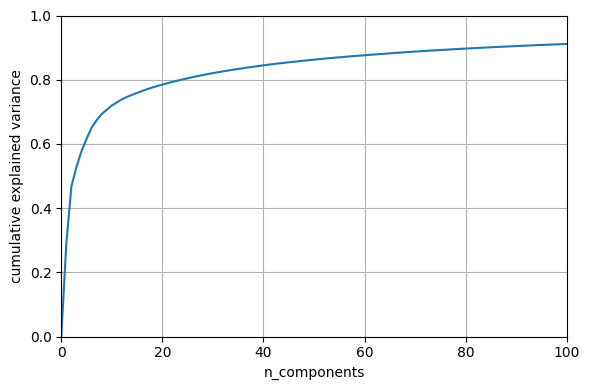

In [72]:
#plot the curve of 'percentage of variance explained' (0~1) vs n_components (0~100)
#apply np.cumsum on explained_variance_ratio_
# use plt.grid() to show grid
# your code:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA

X = (data / 255.0).astype('float32')
ipca = IncrementalPCA(n_components=100, batch_size=1024).fit(X)

cum = np.cumsum(ipca.explained_variance_ratio_)

xs = np.arange(0, len(cum) + 1)
ys = np.concatenate([[0.0], cum])
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(xs, ys)
ax.set_xlim(0, 100); ax.set_ylim(0, 1.0)
ax.set_xlabel("n_components")
ax.set_ylabel("cumulative explained variance")
ax.grid(True)
plt.tight_layout()
plt.show()


In [73]:
# write code to find the smallest value of n_component such that
# (1) average reconstruction error is <= 20%
# (2) percentage of variance explained is >= 80%
# (3) cumulative explained variance ratio >= 80%
# (1), (2) and (3) are essentially the same, so you just use (3)
# you do not need to re-fit the model using this new value of n_component
# your code:

import numpy as np

cum = np.cumsum(ipca.explained_variance_ratio_)
k80 = int(np.searchsorted(cum, 0.80) + 1)

recon_error_pct = (1.0 - cum[k80-1]) * 100.0

print("k80 (≥80% variance):", k80)
print("cumulative variance at k80:", cum[k80-1])
print("approx. reconstruction error at k80: %.2f%%" % recon_error_pct)



k80 (≥80% variance): 24
cumulative variance at k80: 0.8009569078676657
approx. reconstruction error at k80: 19.90%


In [74]:
# get the mean, eigenvalues, and eigenvectors from the pca model
# assume that:
# the name of mean is mu
# the name of eigenvalues is v (a 1D array)
# the name of eigenvectors is w (a 2D array)
# your code:

mu = ipca.mean_
v  = ipca.explained_variance_
w  = ipca.components_

print(mu.shape, v.shape, w.shape)


(784,) (100,) (100, 784)


In [75]:
v.shape

(100,)

In [76]:
w.shape

(100, 784)

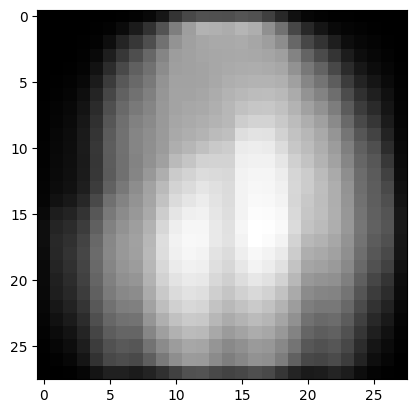

In [81]:
# plot the mean image from pca
# you need to reshape it to 28x28
plt.imshow(mu.reshape(28,28), cmap='gray')

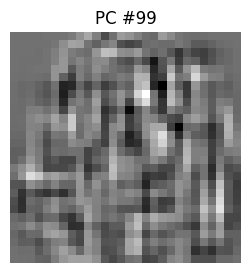

<Figure size 640x480 with 0 Axes>

In [83]:
# use a for loop to show the images of eigenvectors
# image is w[n].reshape(28,28)
# sample code:
# fig, ax = plt.subplots(figsize=(3, 3))
# for n in range(0, 100):
#     ax.imshow(w[n].reshape(28,28), cmap='gray')
#     ax.axis('off')
#     ax.set_title(n)
#     plt.draw()
#     display.clear_output(wait=True)
#     display.display(fig)
#     plt.pause(0.2)
# your code:

import matplotlib.pyplot as plt
from IPython import display

fig, ax = plt.subplots(figsize=(3,3))
for n in range(0,100):
    ax.imshow(w[n].reshape(28,28), cmap='gray', vmin=w[n].min(), vmax=w[n].max())
    ax.axis('off')
    ax.set_title(f"PC #{n}")
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.2)
plt.close(fig)


In [84]:
# L2 norm of an eigenvector w[0]
np.sum(w[0]**2)

np.float64(0.9999999999999997)

In [85]:
# generate a random number
3*np.random.randn()

1.8191243340387953

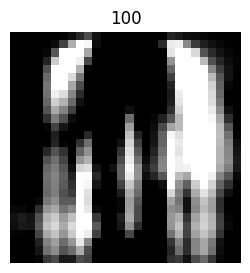

<Figure size 640x480 with 0 Axes>

In [ ]:
# generate and show the new images
# use a for loop to geneate 100 new images
#     inside the for loop
#     x_new = mu + y[0]*sqrt(v[0])*w[0]+...+y[K]*sqrt(v[K])*w[K]
#     use a for loop to get X_new using the above equation
#     K is the number of components
#     y[k] is a random number generated using 3*np.random.randn()
# your code:

import numpy as np
import matplotlib.pyplot as plt
from IPython import display

K = k80                        
sqrtv = np.sqrt(v[:K])        
Wk = w[:K]                  
rng = np.random.RandomState(0)

fig, ax = plt.subplots(figsize=(3,3))
for i in range(100):
    y = 3.0 * rng.randn(K)                
    x_new = mu + (y * sqrtv) @ Wk          
    ax.imshow(np.clip(x_new, 0, 1).reshape(28,28), cmap='gray', vmin=0, vmax=1)
    ax.axis('off')
    ax.set_title(f"{i+1}")
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.15)
plt.close(fig)


PCA is not good at generating images. <br>
There is a better method based on neural networks.

### t-SNE for visualization

In [88]:
#select a subset of data points for TSNE
#because TSNE is very time-consuming
data_s=data[0::100]
target_s=target[0::100]
images_s=images[0::100]

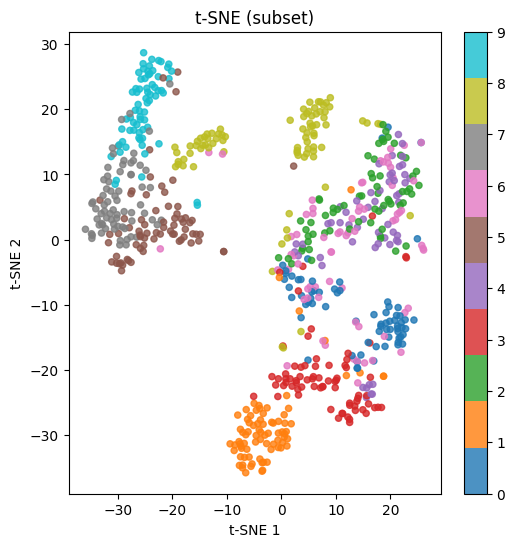

In [90]:
# run t-SNE on data_s and visualize the data in 2D using scatter plot
# because of randomness, there is no unique solution/plot
# your code:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

X_s = (data_s / 255.0).astype('float32')

tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate='auto',
    init='pca',
    max_iter=1000,
    random_state=0
)

Z = tsne.fit_transform(X_s)

fig, ax = plt.subplots(figsize=(6,6))
sc = ax.scatter(Z[:,0], Z[:,1], c=target_s, s=20, cmap='tab10', alpha=0.8)
ax.set_title("t-SNE (subset)")
ax.set_xlabel("t-SNE 1"); ax.set_ylabel("t-SNE 2")
plt.colorbar(sc, ax=ax, ticks=range(10))
plt.show()

